In [56]:
import glob
from pathlib import Path
from experiments import *
from metrics import *
from config import *
from fastai.vision import *
from dataset import pad_tensor, addIgnore

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
random_seed(42)
CSV_PATH = EXPERIMENTS_PATH + '/hrnet/predictions.csv'

folds = list(KFold(n_splits = 5, shuffle = True, random_state=42).split(trainFolders, trainFolders))

for idx, (_, valid_indexes) in enumerate(folds):
    if idx not in [1, 2]:
        m = MetricsCallback(None)
        m.on_train_begin() 
        images = []
        for f in glob.glob(MASKS_PATH + "/**/*.cache"):
            index = trainFolders.index(Path(f).parent.name)
            if index in valid_indexes:
                pred = open_mask( 'hrnet/output/manga/manga/test_results/' + Path(f).parent.name + '/' + Path(f).stem + '.png')
                pred.px = pred.px != 0
                seg = open_mask(f)
                m.on_batch_end(False, pad_tensor(pred.px, 8), seg.px)
        m.calculateMetrics()
        m.save(CSV_PATH, idx > 0)

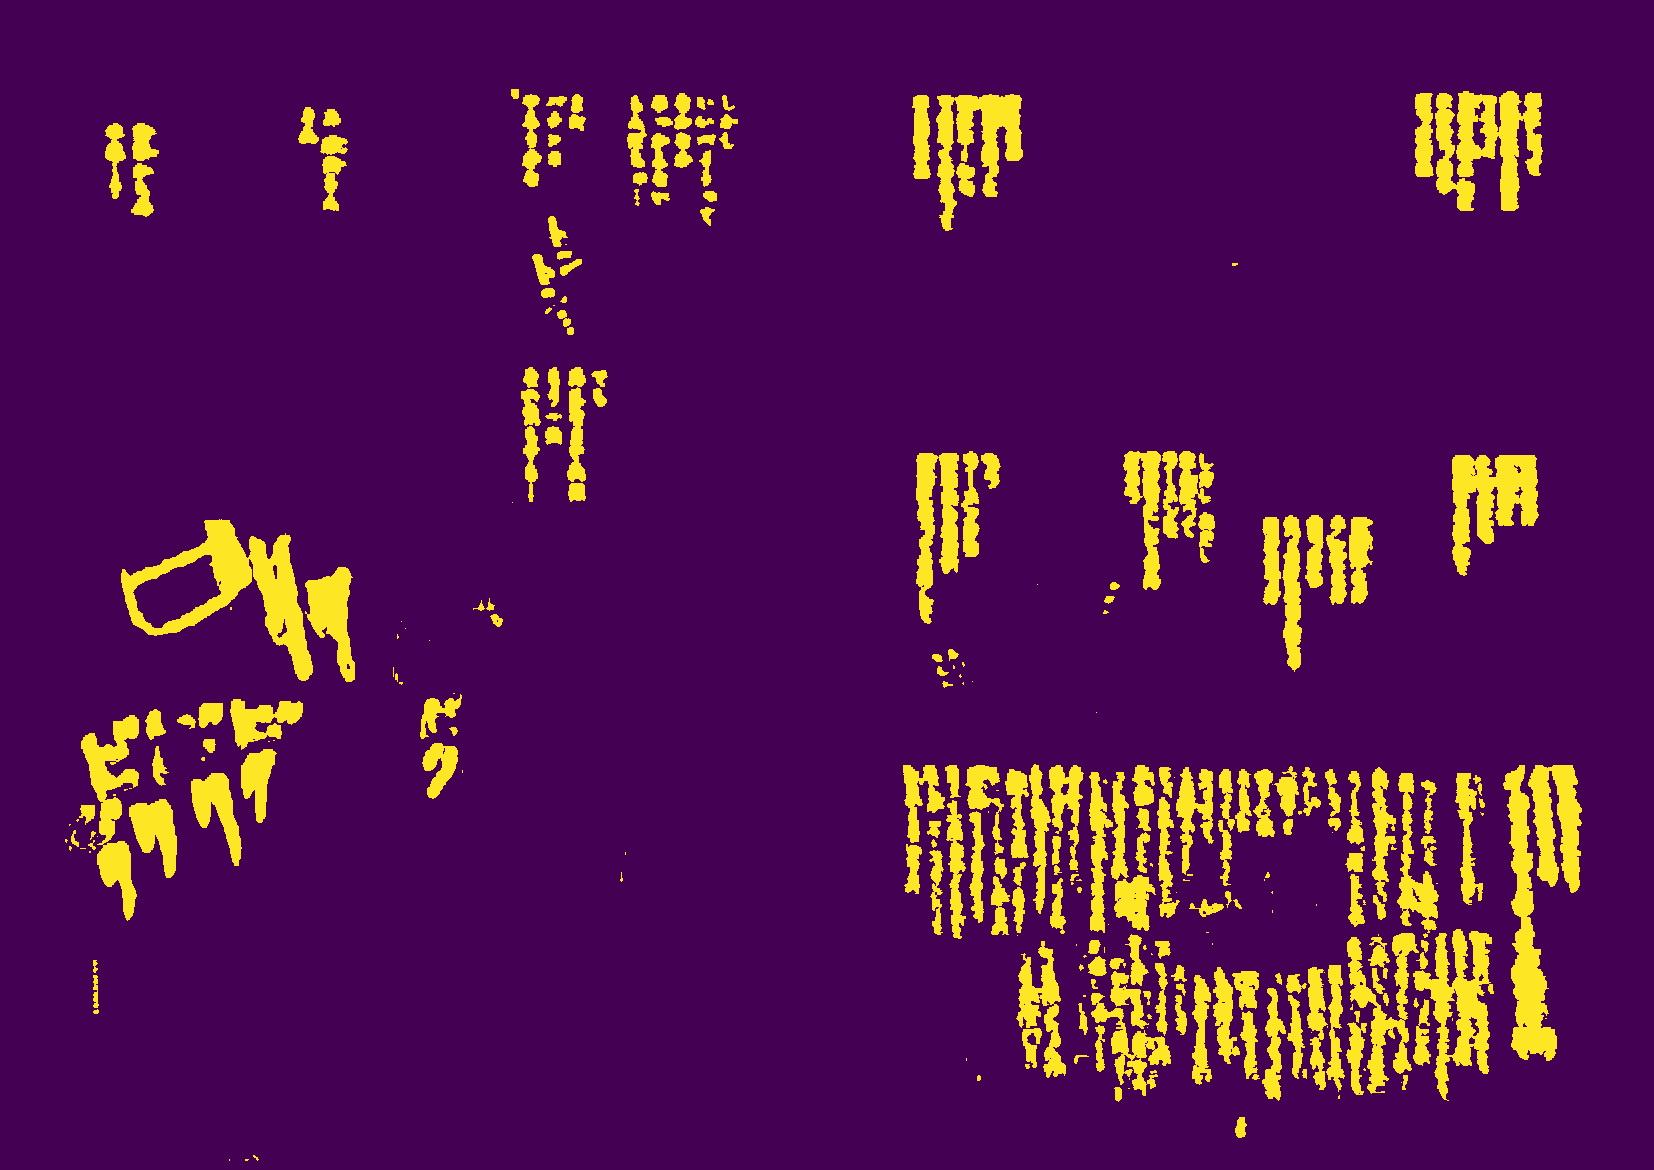

In [67]:
open_mask( 'hrnet/output/manga/manga/test_results/AisazuNihaIrarenai/003.png')